<a href="https://colab.research.google.com/github/keerthanakkumar2002/kruthak_task/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge-AI Engineer Project: Dry Fruits and Nuts Analysis

This notebook implements:
1. Object detection and classification of 4 dry fruits/nuts
2. Segmentation with color and shape extraction
3. Model export to ONNX and TFLite
4. Performance evaluation and visualization
5. Bonus: Framework comparison and error analysis

**Classes:** Cashew, Grapes, Badam (Almond), Dried Grapes (Raisins)

In [ ]:
!pip install ultralytics opencv-python numpy matplotlib tensorflow onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
!pip install tensorflow

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load a pretrained YOLO11m model
# Using segmentation model for both detection and segmentation
model = YOLO('yolo11n-seg.pt')

100%|██████████| 5.90M/5.90M [00:00<00:00, 347MB/s]


In [ ]:
# Train the model
results = model.train(
    data='/content/drive/MyDrive/segmentations.v1i.yolov11 (1)/data.yaml',
    epochs=100,
    imgsz=640,
    batch=8,
    project='nuts_fruits',
    name='detection_segmentation'
)

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/segmentations.v1i.yolov11 (1)/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=detection_segmentation4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

train: Scanning /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/train/labels... 75 images, 2 backgrounds, 0 corrupt: 100%|██████████| 75/75 [01:26<00:00,  1.15s/it]

train: New cache created: /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.5±0.3 ms, read: 0.1±0.0 MB/s, size: 31.8 KB)


val: Scanning /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/labels... 27 images, 0 backgrounds, 0 corrupt: 100%|██████████| 27/27 [00:29<00:00,  1.10s/it]

val: New cache created: /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/labels.cache


Plotting labels to nuts_fruits/detection_segmentation4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to nuts_fruits/detection_segmentation4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.54G     0.4214     0.7685      0.772     0.8746         54        640: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.85it/s]

                   all         27        172      0.989      0.929      0.977       0.93      0.989      0.929      0.975      0.883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.67G     0.4711     0.7794     0.7377     0.8708         59        640: 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         27        172      0.987      0.964      0.986      0.903      0.987      0.964      0.986      0.852



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.69G     0.5205     0.8873     0.9203     0.9525          8        640: 100%|██████████| 10/10 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.70it/s]

                   all         27        172      0.959       0.94      0.969      0.906      0.959       0.94      0.969       0.81



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100       3.7G     0.4657     0.8012     0.7417     0.8965         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.54it/s]

                   all         27        172      0.911      0.924       0.94      0.892      0.911      0.924       0.94      0.794



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.72G     0.4782       0.85     0.7225     0.9279          9        640: 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         27        172      0.898      0.828      0.873      0.782      0.898      0.828      0.873      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.73G     0.4855     0.7706     0.7142     0.8898         36        640: 100%|██████████| 10/10 [00:02<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         27        172      0.881      0.868      0.882      0.787      0.881      0.868      0.882      0.709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.75G     0.5043     0.8646     0.8271     0.9263         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         27        172      0.928      0.875      0.901      0.796      0.928      0.875      0.901      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.77G     0.5173     0.8301     0.7733     0.9112         34        640: 100%|██████████| 10/10 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         27        172       0.66      0.771      0.755      0.687      0.656      0.767      0.751      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.79G     0.5415     0.8794     0.8169     0.9435         33        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         27        172      0.608      0.835       0.69      0.625      0.605      0.831      0.686      0.514



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100       3.8G     0.5616     0.9657     0.8646     0.9264         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]


                   all         27        172      0.754      0.778      0.787      0.715      0.754      0.778      0.787      0.601

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.82G     0.5639     0.9731     0.9335     0.9483         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]


                   all         27        172      0.692      0.769      0.794      0.717      0.692      0.769      0.793      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.83G      0.541     0.8862     0.8474     0.9299         22        640: 100%|██████████| 10/10 [00:02<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         27        172      0.757      0.677      0.692      0.621      0.757      0.677      0.689      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.85G     0.5842      1.058      1.009     0.9784          7        640: 100%|██████████| 10/10 [00:03<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         27        172      0.608      0.756      0.655      0.586      0.608      0.756      0.652      0.527



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.86G     0.5208     0.8868     0.7971     0.9032         32        640: 100%|██████████| 10/10 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         27        172       0.65      0.929      0.714      0.653      0.639       0.88      0.702      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.88G     0.5499      1.019     0.8721     0.9398         19        640: 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         27        172      0.627      0.788      0.672      0.613      0.627      0.788      0.668      0.534

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.89G     0.4991     0.8793     0.7786     0.9227         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]


                   all         27        172      0.827      0.685      0.799      0.714      0.827      0.685      0.799       0.65

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.91G     0.5231     0.9197     0.7928     0.8966         55        640: 100%|██████████| 10/10 [00:03<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


                   all         27        172      0.778      0.795      0.835      0.757      0.778      0.795      0.835      0.707

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.93G     0.5143      0.862      0.725     0.9172         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         27        172      0.895      0.805      0.873      0.795      0.895      0.805      0.873      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.95G     0.5598      1.036      0.868     0.9316         41        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         27        172        0.9      0.752      0.868      0.774      0.896      0.746      0.863      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.96G     0.5314     0.9479     0.8243     0.9389         10        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         27        172      0.785      0.745      0.769      0.696      0.781      0.741      0.764      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.98G     0.5697     0.9815     0.7801     0.9212         38        640: 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         27        172      0.804      0.756      0.808      0.714        0.8      0.752      0.806      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.99G     0.5498     0.8433     0.8029     0.9269         57        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]


                   all         27        172      0.762      0.756      0.811      0.737      0.762      0.756      0.808      0.615

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.01G      0.513     0.7946      0.757     0.9133         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         27        172      0.832      0.734      0.795      0.713      0.832      0.734      0.792      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.03G     0.5273     0.8668     0.7482     0.9029         80        640: 100%|██████████| 10/10 [00:02<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         27        172      0.883      0.725        0.8      0.717      0.883      0.725      0.802      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.04G     0.5554     0.9057      0.825     0.9322         52        640: 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]


                   all         27        172      0.803      0.713      0.798      0.705      0.803      0.713      0.801      0.636

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.06G     0.5106     0.7858       0.74     0.9063         72        640: 100%|██████████| 10/10 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         27        172      0.912      0.828      0.871      0.774      0.912      0.828      0.871       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.07G     0.4877     0.7953     0.7123     0.9094         35        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         27        172      0.902      0.834      0.864      0.769      0.902      0.834      0.864      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.09G     0.5293     0.9188     0.8025     0.9216         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         27        172      0.806      0.785      0.852       0.76      0.806      0.785      0.852      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.11G     0.5013     0.7638     0.6985     0.8895         41        640: 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         27        172      0.851      0.756      0.872      0.784      0.851      0.756      0.872      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.12G     0.5228     0.8994     0.7965     0.9209         20        640: 100%|██████████| 10/10 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]


                   all         27        172      0.854      0.818      0.857       0.76      0.854      0.818      0.857      0.707

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.14G     0.4992     0.8424     0.7079     0.9183         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]


                   all         27        172       0.74       0.83       0.83      0.731       0.74       0.83       0.83      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.16G     0.4819     0.7918     0.6357      0.893         48        640: 100%|██████████| 10/10 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         27        172      0.783      0.759      0.806      0.726      0.783      0.759      0.806      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.17G     0.4906     0.8191     0.7168     0.8936         27        640: 100%|██████████| 10/10 [00:03<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]


                   all         27        172      0.878      0.714      0.823      0.746      0.878      0.714      0.823      0.658

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.19G     0.4927     0.9213     0.6989     0.9063         22        640: 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         27        172      0.868      0.773      0.867      0.806      0.868      0.773      0.867      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.21G     0.4798     0.8544     0.7308     0.9051         45        640: 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]


                   all         27        172      0.854      0.792      0.874      0.801      0.854      0.792      0.874      0.702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.22G     0.5279     0.9054     0.7024     0.9168         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         27        172      0.806       0.79      0.846      0.786      0.801      0.792      0.846      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.24G     0.4878     0.7717     0.7157     0.9243         54        640: 100%|██████████| 10/10 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]


                   all         27        172      0.822      0.768      0.814      0.742      0.819      0.773      0.814      0.647

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.25G     0.4589     0.7497     0.6981     0.8975         15        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         27        172      0.792      0.764      0.714       0.63      0.774      0.714      0.692      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.27G     0.4529     0.7953     0.7186      0.889         28        640: 100%|██████████| 10/10 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         27        172      0.657        0.8      0.649      0.597      0.645       0.75      0.639      0.529



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.29G     0.4751     0.7849     0.6909     0.9108         53        640: 100%|██████████| 10/10 [00:02<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         27        172      0.603       0.86       0.65      0.599      0.603       0.86       0.65      0.536



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100       4.3G     0.4697     0.8679     0.6638     0.8832         46        640: 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]


                   all         27        172      0.645      0.821      0.679      0.625      0.645      0.821      0.679      0.565

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.32G     0.4233     0.6592       0.59     0.8776         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         27        172      0.695      0.814      0.774      0.703      0.695      0.814      0.774      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.34G     0.4279     0.7106     0.6187     0.8791         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         27        172      0.723      0.825      0.815      0.747      0.723      0.825      0.815      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.35G     0.4854     0.8749     0.7287     0.9081         86        640: 100%|██████████| 10/10 [00:03<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         27        172       0.74      0.806      0.823      0.753       0.74      0.806      0.823      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.37G     0.5177     0.8692     0.6951      0.913         39        640: 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         27        172      0.755      0.755      0.749       0.68      0.755      0.755      0.749      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.38G     0.4792     0.7719     0.6714     0.9123         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         27        172      0.801       0.79      0.803      0.722      0.801       0.79      0.803       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100       4.4G     0.5016     0.7978     0.6743     0.9158         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         27        172      0.989      0.744      0.826      0.729      0.932       0.69      0.777      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.42G     0.4813     0.7859     0.6498     0.9136         20        640: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         27        172      0.977      0.742      0.836      0.724      0.977      0.742      0.836       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.43G     0.4477     0.7342     0.6539     0.9102         16        640: 100%|██████████| 10/10 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


                   all         27        172      0.846      0.811      0.837      0.736      0.846      0.811      0.837      0.578

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.45G     0.4566      0.766     0.6341     0.8967         31        640: 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.27it/s]

                   all         27        172      0.793      0.801      0.835      0.759      0.812      0.741      0.804      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.46G      0.451     0.7269      0.576     0.8914         27        640: 100%|██████████| 10/10 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         27        172      0.748      0.786       0.78      0.717      0.736      0.729      0.768      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.48G     0.4752     0.7599     0.7286     0.9252         26        640: 100%|██████████| 10/10 [00:02<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.73it/s]

                   all         27        172      0.682      0.839      0.717      0.658      0.671      0.789      0.709      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       4.5G     0.5163     0.7862     0.6364     0.9094         43        640: 100%|██████████| 10/10 [00:02<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


                   all         27        172      0.696      0.834      0.724      0.664      0.683      0.784      0.714      0.589

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.51G     0.4718     0.7794     0.6042     0.9041         18        640: 100%|██████████| 10/10 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         27        172      0.781      0.803      0.835      0.743       0.73      0.757      0.795      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.53G      0.447     0.7114     0.5864     0.8885         52        640: 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         27        172      0.798      0.808      0.845       0.76      0.755      0.758      0.799       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.55G     0.4507     0.7416     0.5972     0.8866         40        640: 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         27        172      0.808       0.83      0.826      0.752      0.756       0.78      0.782      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.56G     0.4451     0.7877     0.6243     0.8941         24        640: 100%|██████████| 10/10 [00:02<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         27        172      0.789      0.819      0.829      0.756      0.739      0.771      0.771      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.58G     0.4193     0.6769     0.5542     0.8754         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]


                   all         27        172      0.838      0.806       0.85      0.773      0.838      0.806       0.85      0.652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100       4.6G     0.4557     0.7254     0.6043     0.8962         27        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.52it/s]

                   all         27        172      0.865      0.812      0.865      0.793      0.865      0.812      0.865      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.61G     0.4376     0.7067     0.5459     0.8756         73        640: 100%|██████████| 10/10 [00:03<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         27        172      0.869      0.831      0.872      0.799      0.869      0.831      0.872      0.739



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.63G     0.4387     0.7048     0.5398     0.8581         33        640: 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]


                   all         27        172      0.878      0.823      0.882      0.815      0.878      0.823      0.882      0.756

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.64G     0.4289     0.7431     0.5745     0.8961         25        640: 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]


                   all         27        172      0.903      0.849      0.911      0.816      0.903      0.849      0.911      0.761

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.66G     0.4228     0.6937     0.6022     0.8833         13        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         27        172      0.865      0.888      0.892      0.796      0.865      0.888      0.892      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.68G     0.4312     0.6796     0.5556     0.8776         22        640: 100%|██████████| 10/10 [00:04<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         27        172      0.862      0.841      0.869      0.784      0.862      0.841      0.869      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.69G     0.4623     0.7168     0.5567     0.8828         42        640: 100%|██████████| 10/10 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         27        172      0.843      0.875      0.863      0.781      0.837      0.874      0.863      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.71G     0.4559     0.7092     0.5629      0.883         17        640: 100%|██████████| 10/10 [00:02<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         27        172      0.846      0.835      0.861      0.768      0.846      0.835      0.861      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.72G     0.3907     0.6396     0.5287     0.8627         43        640: 100%|██████████| 10/10 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.85it/s]

                   all         27        172      0.864       0.83      0.869      0.783      0.864       0.83      0.869      0.674



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.74G      0.439     0.7192     0.5666     0.8938         25        640: 100%|██████████| 10/10 [00:03<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]


                   all         27        172      0.921      0.822      0.884      0.805      0.925      0.821      0.884      0.709

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.76G     0.3936     0.6557      0.536     0.8715         21        640: 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]


                   all         27        172      0.931       0.84      0.887      0.807      0.931       0.84      0.887      0.726

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.78G     0.4703     0.7385     0.5697     0.8991         68        640: 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         27        172      0.913      0.813      0.876      0.792      0.913      0.813      0.876      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.79G     0.3963     0.6612     0.5053      0.857         42        640: 100%|██████████| 10/10 [00:04<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.87it/s]

                   all         27        172      0.841      0.808       0.87      0.786      0.841      0.808       0.87      0.722



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.81G     0.3868     0.6308     0.4696     0.8541         27        640: 100%|██████████| 10/10 [00:04<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         27        172      0.795      0.789      0.867      0.792      0.795      0.789      0.867      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.82G     0.3873      0.594     0.4907     0.8651         24        640: 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         27        172      0.884      0.793      0.863      0.788      0.884      0.793      0.863      0.744



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.84G      0.404     0.6815     0.5496     0.8817         39        640: 100%|██████████| 10/10 [00:03<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         27        172      0.946      0.838       0.86      0.785      0.946      0.838       0.86      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.86G     0.4124     0.6986      0.525     0.8696         14        640: 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         27        172      0.928      0.834      0.861      0.787      0.928      0.834      0.861       0.73



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.87G     0.4057     0.6579     0.5427     0.8823         12        640: 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         27        172       0.93       0.84      0.856      0.779       0.93       0.84      0.856      0.723



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.89G     0.4304     0.7305     0.5589     0.8983         43        640: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


                   all         27        172      0.936       0.84      0.856      0.782      0.936       0.84      0.855      0.704

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100       4.9G     0.3992     0.6635     0.5157     0.8821         44        640: 100%|██████████| 10/10 [00:02<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         27        172      0.959      0.838      0.859      0.773      0.959      0.838      0.855      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.92G     0.4024     0.6338      0.484      0.869         24        640: 100%|██████████| 10/10 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]


                   all         27        172      0.953      0.838      0.858      0.769      0.895      0.788      0.805      0.701

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.94G     0.4135     0.6357     0.4981     0.8632         48        640: 100%|██████████| 10/10 [00:03<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.41it/s]

                   all         27        172      0.936      0.849      0.861      0.777      0.879      0.799      0.807      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.96G     0.4267     0.6886     0.5377     0.8772         22        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]


                   all         27        172       0.94       0.84      0.864      0.778      0.883      0.791      0.808       0.68

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.97G      0.405     0.6137     0.5748     0.8805          6        640: 100%|██████████| 10/10 [00:02<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.52it/s]


                   all         27        172      0.923      0.836      0.857      0.791      0.923      0.836      0.855      0.662

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.99G     0.4136      0.698     0.5408     0.8712         43        640: 100%|██████████| 10/10 [00:02<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         27        172      0.925      0.822      0.856      0.791      0.925      0.822      0.854      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100         5G     0.4126     0.6014     0.5034     0.8952         16        640: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         27        172      0.903      0.823      0.858      0.795      0.903      0.823      0.853      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.02G       0.39     0.6147     0.5047     0.8827         25        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]

                   all         27        172      0.897      0.832      0.858      0.793      0.897      0.832      0.856      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.04G     0.3911     0.6544     0.5107      0.876         23        640: 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         27        172      0.929      0.803      0.856      0.784      0.929      0.803      0.854      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.05G     0.4258     0.7445     0.5216     0.8688         89        640: 100%|██████████| 10/10 [00:02<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         27        172       0.92      0.818      0.856      0.782       0.92      0.818      0.854      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.07G     0.4255     0.6695     0.4949     0.9018         40        640: 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.67it/s]

                   all         27        172      0.923      0.808      0.859      0.786      0.923      0.808      0.855       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.08G     0.3919     0.6386     0.5024     0.8722         36        640: 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.06it/s]

                   all         27        172      0.957      0.778      0.859      0.788      0.957      0.778      0.856      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100       5.1G     0.3971     0.6612      0.511     0.8801         16        640: 100%|██████████| 10/10 [00:02<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.96it/s]

                   all         27        172      0.873      0.785      0.862      0.792      0.873      0.785      0.859      0.653


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      5.12G     0.3231     0.5885     0.5601     0.8357         38        640: 100%|██████████| 10/10 [00:05<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         27        172      0.865      0.795      0.862      0.791      0.865      0.795      0.859      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      5.14G     0.3226     0.5431     0.4601     0.8197         29        640: 100%|██████████| 10/10 [00:01<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         27        172      0.901      0.792      0.861      0.792      0.901      0.792      0.858      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      5.15G     0.3132     0.5536     0.4802     0.8148         12        640: 100%|██████████| 10/10 [00:01<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


                   all         27        172      0.915      0.803      0.862      0.798      0.915      0.803      0.859      0.669

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      5.17G     0.3073     0.5714     0.4996     0.8389         13        640: 100%|██████████| 10/10 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all         27        172      0.933      0.819      0.869      0.805      0.933      0.819      0.865      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      5.19G     0.3013      0.553     0.4553     0.8271         27        640: 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         27        172      0.937      0.818       0.87      0.811      0.937      0.818      0.866      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100       5.2G     0.3177     0.5507     0.4321     0.8209         20        640: 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         27        172      0.945      0.819      0.873      0.814      0.945      0.819      0.868      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100      5.22G     0.3367     0.5968     0.5498     0.8298         12        640: 100%|██████████| 10/10 [00:01<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         27        172      0.939      0.818      0.871      0.813      0.939      0.818      0.867      0.707



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      5.24G     0.3094     0.5697     0.4916       0.81         25        640: 100%|██████████| 10/10 [00:01<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]


                   all         27        172      0.928      0.815      0.873      0.806      0.928      0.815      0.869      0.694

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      5.25G     0.3274     0.5639     0.4688     0.8375         10        640: 100%|██████████| 10/10 [00:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         27        172      0.924      0.813      0.875      0.814      0.924      0.813      0.871      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.27G     0.3237     0.5347     0.4665     0.8219         38        640: 100%|██████████| 10/10 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         27        172      0.915      0.813      0.876      0.812      0.915      0.813      0.872      0.687



100 epochs completed in 0.107 hours.
Optimizer stripped from nuts_fruits/detection_segmentation4/weights/last.pt, 6.0MB
Optimizer stripped from nuts_fruits/detection_segmentation4/weights/best.pt, 6.0MB

Validating nuts_fruits/detection_segmentation4/weights/best.pt...
Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-seg summary (fused): 113 layers, 2,835,348 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:00<00:00,  2.83it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.23it/s]


                   all         27        172      0.989      0.929      0.977      0.929      0.989      0.929      0.975      0.883
                almond          7         60       0.99          1      0.995      0.975       0.99          1      0.995      0.953
                cashew          9         82      0.984          1      0.994      0.962      0.984          1      0.994      0.902
                grapes          4          5      0.981          1      0.995      0.971      0.981          1      0.995      0.888
                raisin          7         25          1      0.715      0.924      0.809          1      0.715      0.918      0.789
Speed: 0.8ms preprocess, 4.1ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to nuts_fruits/detection_segmentation4


In [22]:
# Load the best trained model
pt_model = YOLO('/content/nuts_fruits/detection_segmentation4/weights/best.pt')


image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/OIP-1-_jpg.rf.2f968148e2ae3b2714c1ce6a3ed42243.jpg: 640x640 1 almond, 21.5ms
Speed: 2.8ms preprocess, 21.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


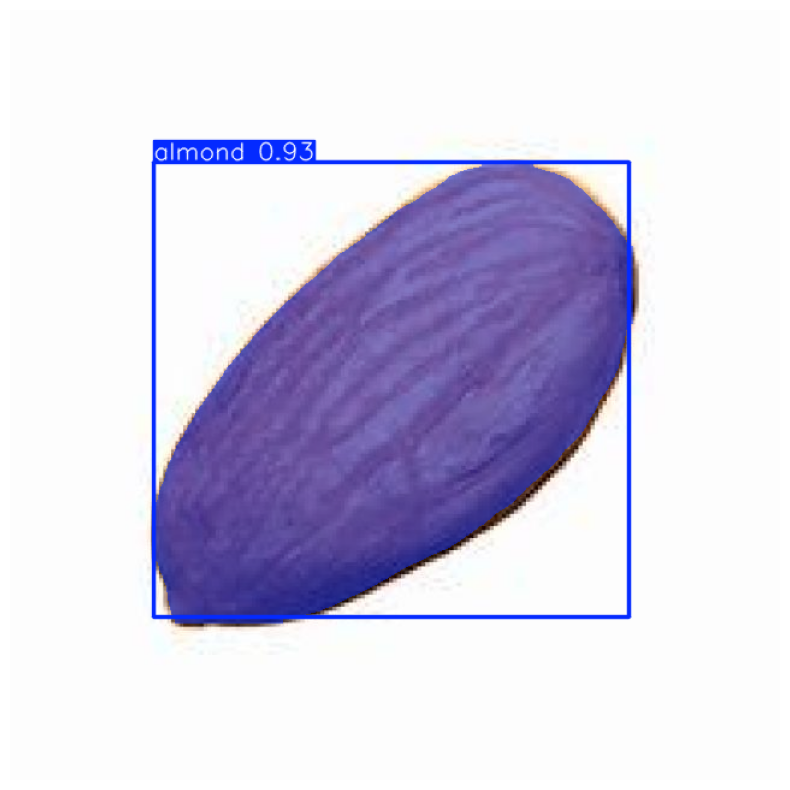

Saved result to: /content/image_inference_results/processed_OIP-1-_jpg.rf.2f968148e2ae3b2714c1ce6a3ed42243.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1048756102-612x612_jpg.rf.80758c7aaa7ea01a8650525f449cee6e.jpg: 640x640 3 raisins, 19.3ms
Speed: 2.8ms preprocess, 19.3ms inference, 9.9ms postprocess per image at shape (1, 3, 640, 640)


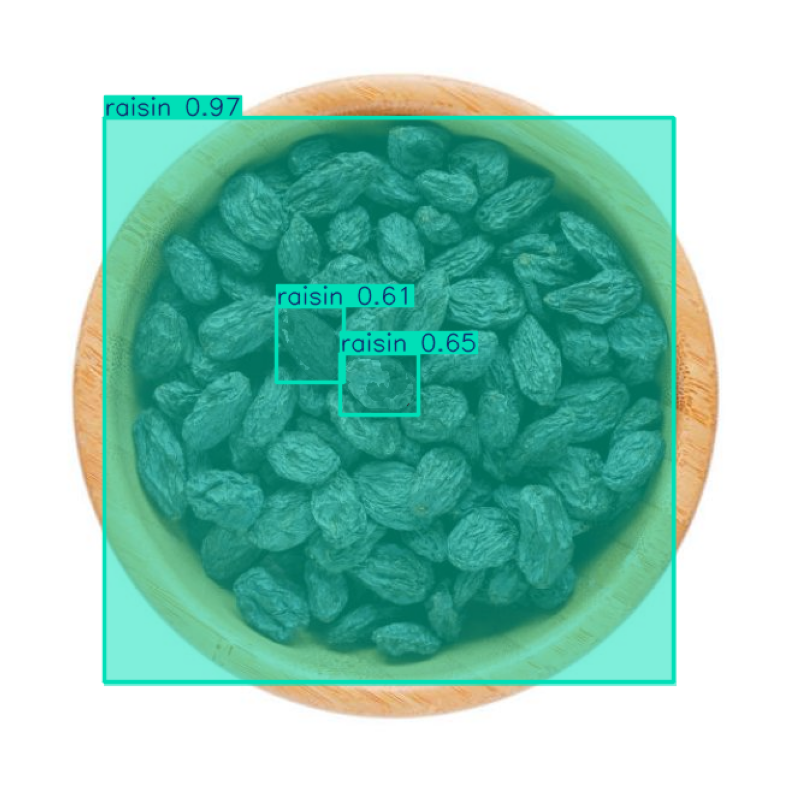

Saved result to: /content/image_inference_results/processed_istockphoto-1048756102-612x612_jpg.rf.80758c7aaa7ea01a8650525f449cee6e.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1129162527-612x612_jpg.rf.98684a77f3a7de50707335330c1a2b66.jpg: 640x640 2 grapess, 15.5ms
Speed: 2.8ms preprocess, 15.5ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


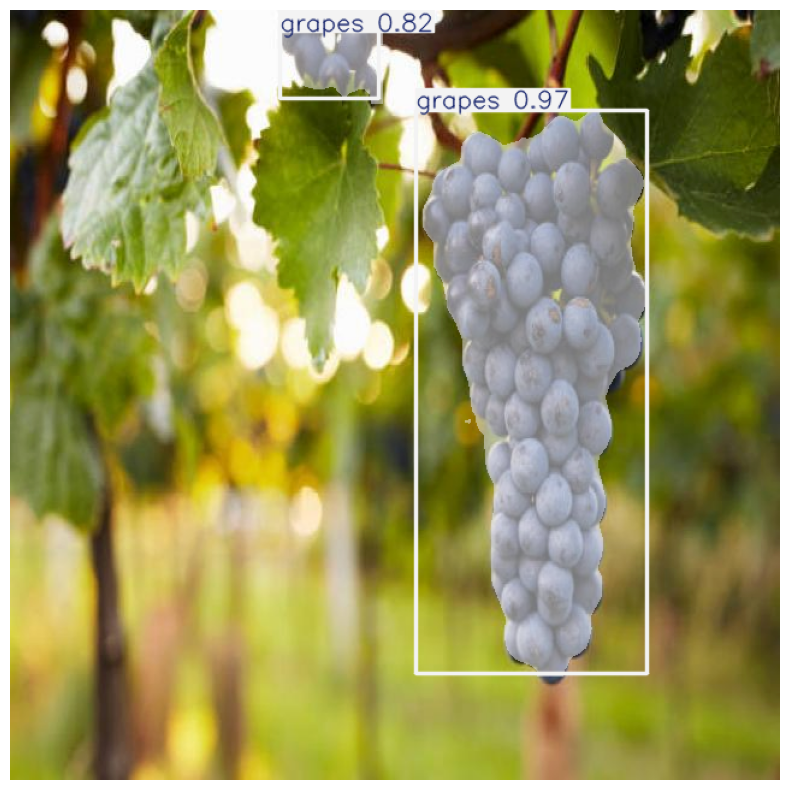

Saved result to: /content/image_inference_results/processed_istockphoto-1129162527-612x612_jpg.rf.98684a77f3a7de50707335330c1a2b66.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1172294825-612x612_jpg.rf.59215a0c417fd766cdca468f8266bd85.jpg: 640x640 7 raisins, 17.4ms
Speed: 2.7ms preprocess, 17.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


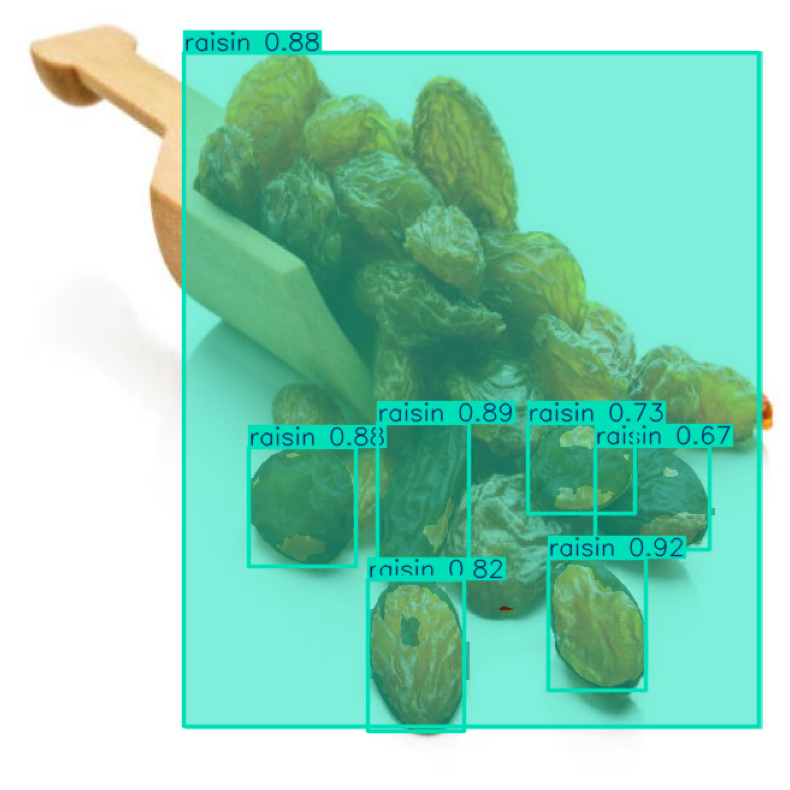

Saved result to: /content/image_inference_results/processed_istockphoto-1172294825-612x612_jpg.rf.59215a0c417fd766cdca468f8266bd85.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1191377854-612x612_jpg.rf.7dc9a4804ceba15a99e41af85f3080b1.jpg: 640x640 8 cashews, 15.8ms
Speed: 3.1ms preprocess, 15.8ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)


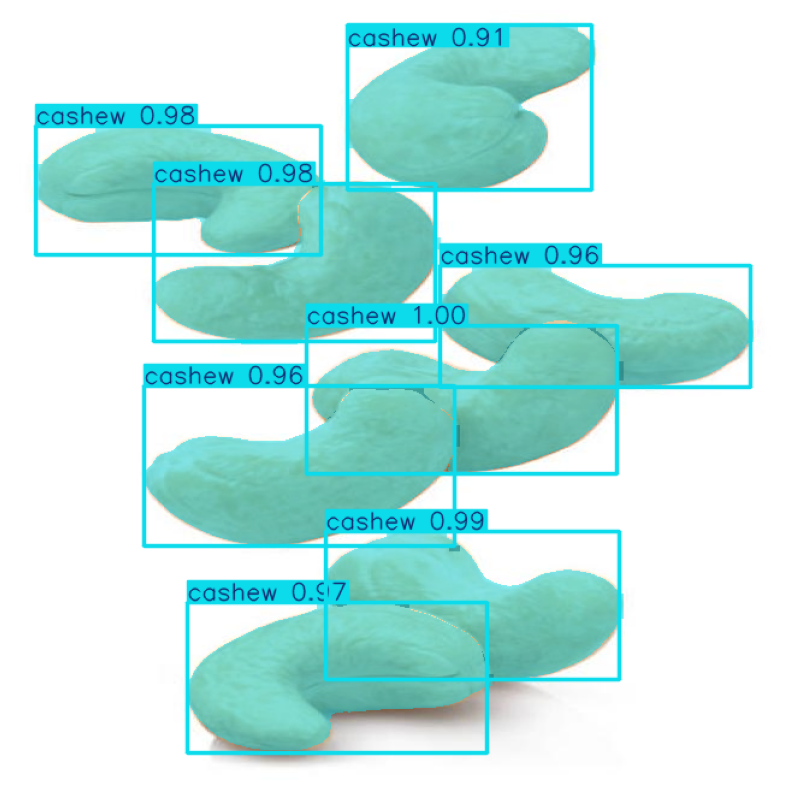

Saved result to: /content/image_inference_results/processed_istockphoto-1191377854-612x612_jpg.rf.7dc9a4804ceba15a99e41af85f3080b1.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1219713837-612x612_jpg.rf.b951a72d7d9845e2e6a96b4edeed9a8f.jpg: 640x640 8 almonds, 17.4ms
Speed: 2.9ms preprocess, 17.4ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


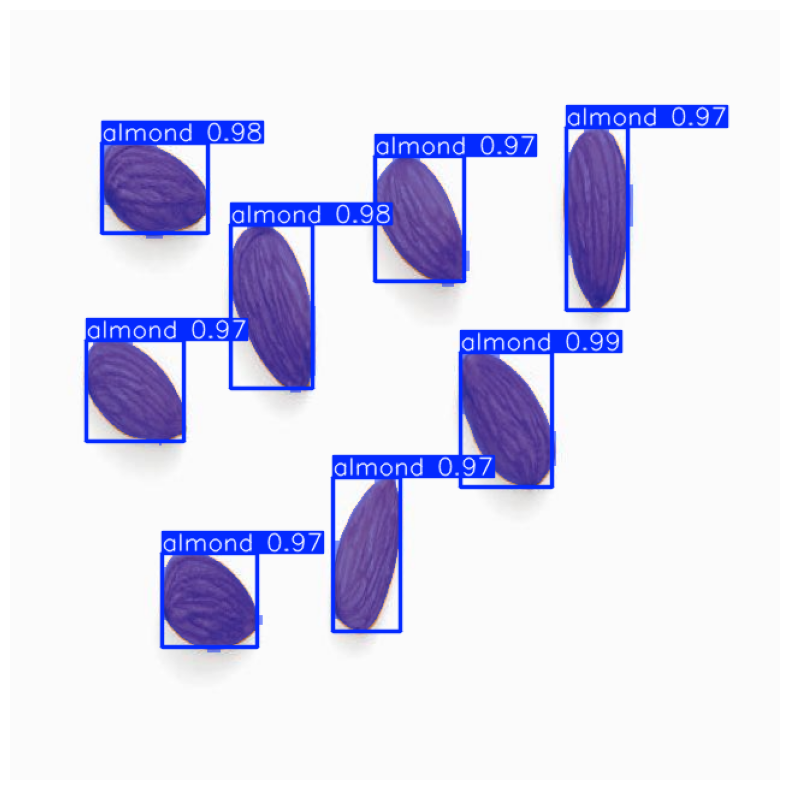

Saved result to: /content/image_inference_results/processed_istockphoto-1219713837-612x612_jpg.rf.b951a72d7d9845e2e6a96b4edeed9a8f.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1310594793-612x612_jpg.rf.63dfe645a894023d7146e1fcb07484a7.jpg: 640x640 13 cashews, 15.8ms
Speed: 3.0ms preprocess, 15.8ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 640)


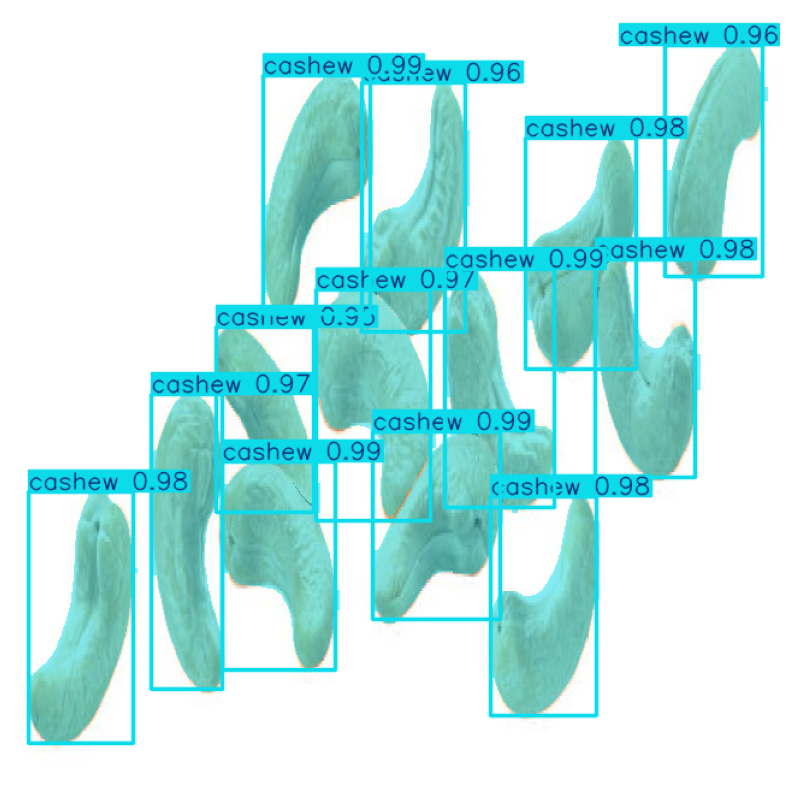

Saved result to: /content/image_inference_results/processed_istockphoto-1310594793-612x612_jpg.rf.63dfe645a894023d7146e1fcb07484a7.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1370650471-612x612_jpg.rf.5891739b7fb08ae351876b0b68604f43.jpg: 640x640 7 cashews, 14.9ms
Speed: 2.7ms preprocess, 14.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


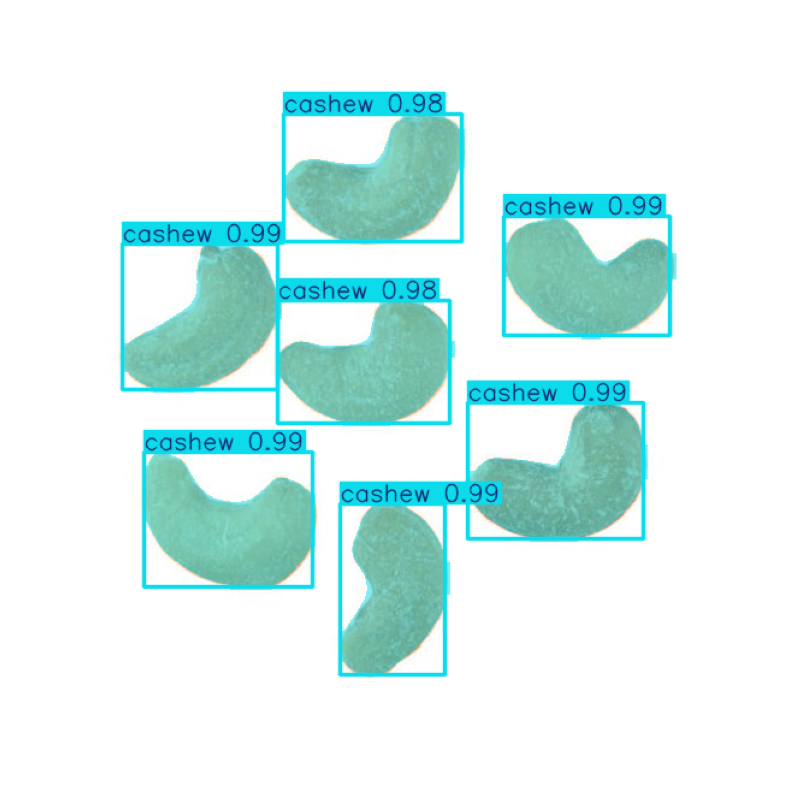

Saved result to: /content/image_inference_results/processed_istockphoto-1370650471-612x612_jpg.rf.5891739b7fb08ae351876b0b68604f43.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1403724560-612x612_jpg.rf.1de0370902704183a3515259555182fb.jpg: 640x640 1 raisin, 20.4ms
Speed: 3.2ms preprocess, 20.4ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


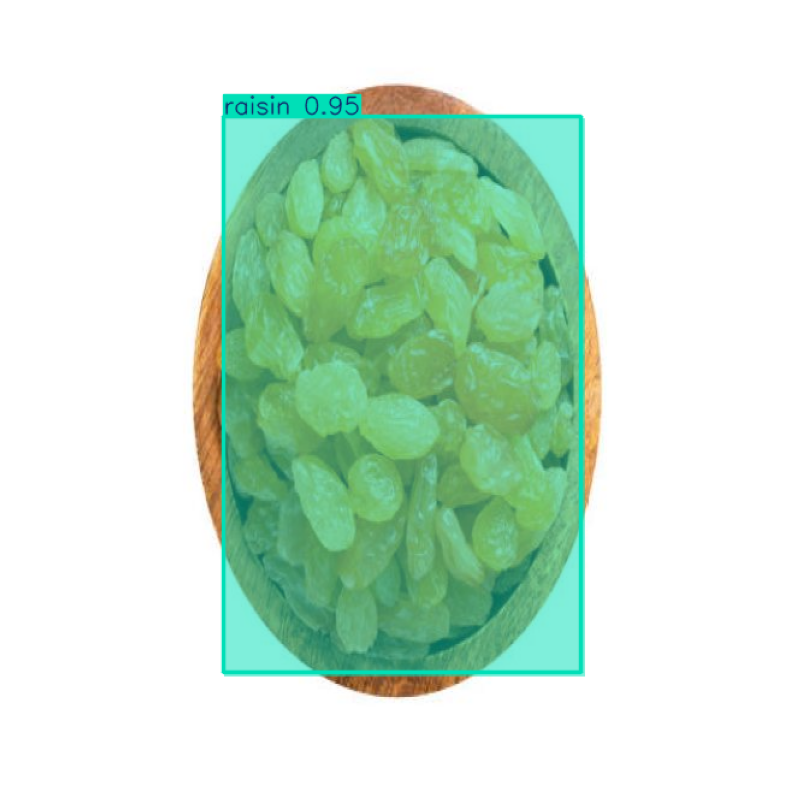

Saved result to: /content/image_inference_results/processed_istockphoto-1403724560-612x612_jpg.rf.1de0370902704183a3515259555182fb.jpg

image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/istockphoto-1487250541-612x612_jpg.rf.826cc7efe932218a1c40c50a20cbbd46.jpg: 640x640 1 cashew, 15.5ms
Speed: 2.7ms preprocess, 15.5ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


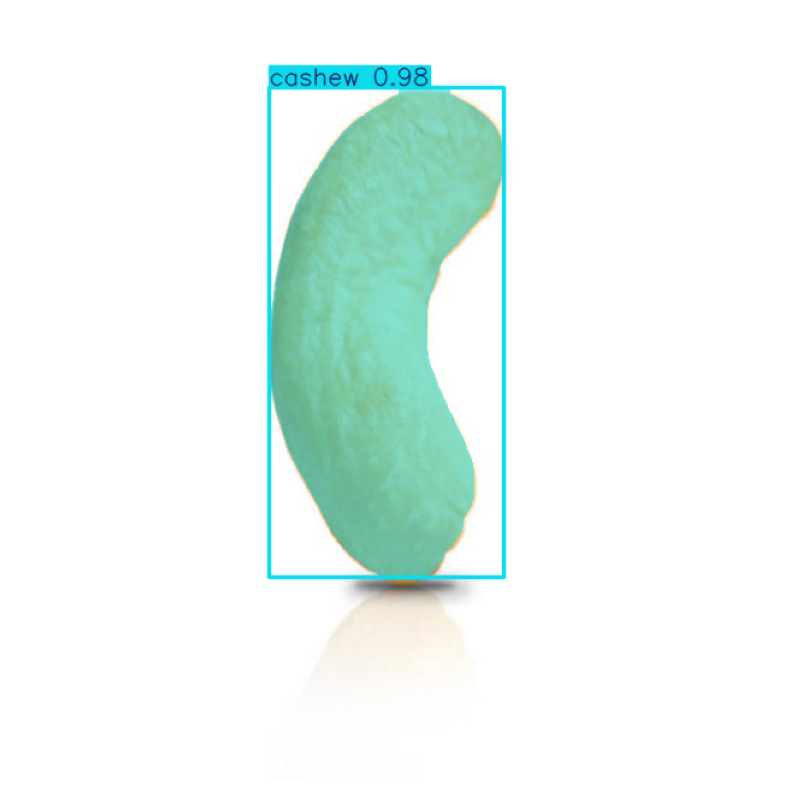

Saved result to: /content/image_inference_results/processed_istockphoto-1487250541-612x612_jpg.rf.826cc7efe932218a1c40c50a20cbbd46.jpg

All results saved to: /content/image_inference_results


In [25]:
# Image Inference
VAL_IMAGES = "/content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images"
OUTPUT_DIR = "/content/image_inference_results"
os.makedirs(OUTPUT_DIR, exist_ok=True)

test_images = [os.path.join(VAL_IMAGES, f) for f in sorted(os.listdir(VAL_IMAGES))[:10]]

# Process each image
for img_path in test_images:
    results = pt_model(img_path, conf=0.4)

    for r in results:
        im_array = r.plot()
        im_rgb = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

        # Display the result
        plt.figure(figsize=(10, 10))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.show()

        # Save the result
        img_name = os.path.basename(img_path)
        output_path = os.path.join(OUTPUT_DIR, f"processed_{img_name}")
        cv2.imwrite(output_path, im_array)
        print(f"Saved result to: {output_path}")

print(f"\nAll results saved to: {OUTPUT_DIR}")

In [ ]:
# # Run inference on a video (upload your test video)
# uploaded = files.upload()
# video_file = list(uploaded.keys())[0]

In [ ]:
video_results = pt_model.predict(
    source=f"/content/{video_file}",
    conf=0.4,
    save=True,
    save_txt=True,
    project="/content/results",
    name="video_inference"
)

In [ ]:
# Step 4: Verify Result
output_video = "/content/results/video_inference/" + video_file
# Video(output_video, embed=True, width=640)

# Task 2

In [26]:
def get_dominant_color(mask, image):
    """Extract dominant color from the masked region"""
    masked = cv2.bitwise_and(image, image, mask=mask)
    pixels = masked.reshape(-1, 3)
    pixels = pixels[np.any(pixels != 0, axis=1)]

    if len(pixels) == 0:
        return "Unknown"

    # Get dominant color
    dominant_color = np.median(pixels, axis=0).astype(int)

    # Simple color naming
    color_names = {
        'brown': [165, 42, 42],
        'green': [0, 128, 0],
        'yellow': [255, 255, 0],
        'gold': [255, 215, 0],
        'black': [0, 0, 0]
    }

    # Find closest named color
    min_dist = float('inf')
    closest_color = "Unknown"
    for name, rgb in color_names.items():
        dist = np.linalg.norm(dominant_color - rgb)
        if dist < min_dist:
            min_dist = dist
            closest_color = name

    return closest_color

In [ ]:
def get_shape(mask):
    """Determine approximate shape from mask"""
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        return "Unknown"

    cnt = max(contours, key=cv2.contourArea)
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)

    if perimeter == 0:
        return "Unknown"

    circularity = 4 * np.pi * (area / (perimeter * perimeter))

    if circularity > 0.8:
        return "Round"
    elif circularity > 0.6:
        return "Oval"
    else:
        return "Irregular"


image 1/1 /content/drive/MyDrive/segmentations.v1i.yolov11 (1)/valid/images/OIP-1-_jpg.rf.2f968148e2ae3b2714c1ce6a3ed42243.jpg: 640x640 1 almond, 15.8ms
Speed: 2.7ms preprocess, 15.8ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)
Saved: /content/processed_images/OIP-1-_jpg.rf.2f968148e2ae3b2714c1ce6a3ed42243_object_1.jpg


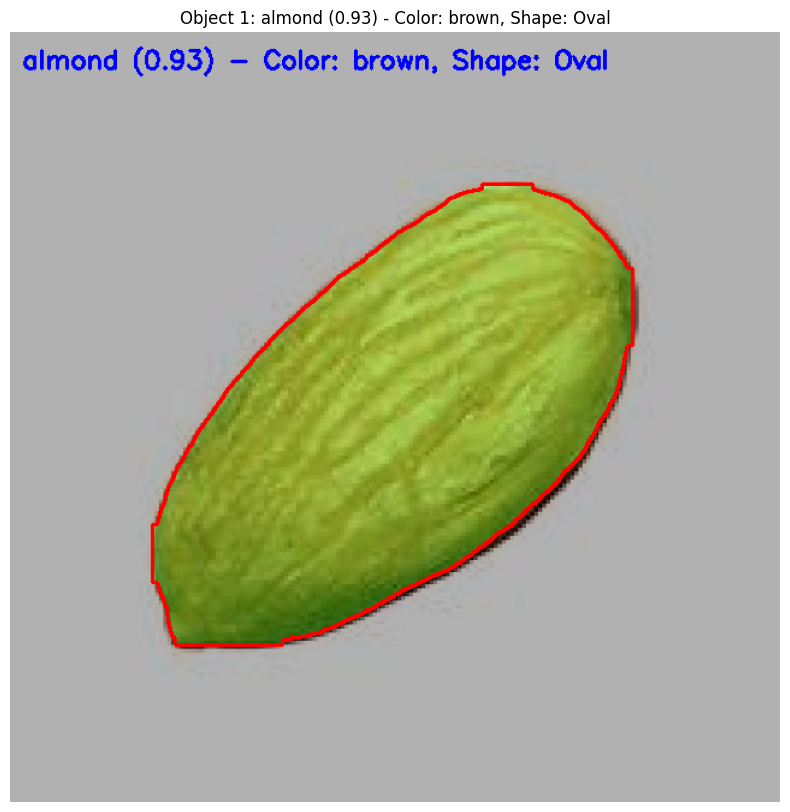


All processed images saved to: /content/processed_images


In [ ]:
output_dir = "/content/processed_images"
os.makedirs(output_dir, exist_ok=True)

# Process sample image with segmentation and feature extraction
sample_img_path = test_images[0]
results = pt_model(sample_img_path, conf=0.4)

for r_idx, r in enumerate(results):
    img = cv2.cvtColor(r.orig_img, cv2.COLOR_BGR2RGB)

    # For each detected object
    for i, mask in enumerate(r.masks.data.cpu().numpy()):
        mask = (mask * 255).astype(np.uint8)

        # Get object info
        class_id = r.boxes.cls[i].item()
        class_name = pt_model.names[int(class_id)]
        conf = r.boxes.conf[i].item()

        # Extract features
        color = get_dominant_color(mask, img)
        shape = get_shape(mask)

        # Draw mask and info
        colored_mask = np.zeros_like(img)
        colored_mask[mask > 0] = [0, 255, 0]  # Green mask

        # Combine mask with original image
        combined = cv2.addWeighted(img, 0.7, colored_mask, 0.3, 0)

        # Draw contours
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(combined, contours, -1, (255, 0, 0), 2)

        # Add text
        text = f"{class_name} ({conf:.2f}) - Color: {color}, Shape: {shape}"
        cv2.putText(combined, text, (10, 30 + i*30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        # Convert back to BGR for saving with OpenCV
        combined_bgr = cv2.cvtColor(combined, cv2.COLOR_RGB2BGR)

        # Generate output filename
        base_name = os.path.basename(sample_img_path)
        name_without_ext = os.path.splitext(base_name)[0]
        output_filename = f"{name_without_ext}_object_{i+1}.jpg"
        output_path = os.path.join(output_dir, output_filename)

        # Save the image
        cv2.imwrite(output_path, combined_bgr)
        print(f"Saved: {output_path}")

        # Display (optional)
        plt.figure(figsize=(10, 10))
        plt.imshow(combined)
        plt.axis('off')
        plt.title(f"Object {i+1}: {text}")
        plt.show()

print(f"\nAll processed images saved to: {output_dir}")

In [27]:
# Export to ONNX
pt_model.export(format='onnx')

# First export to TensorFlow SavedModel
pt_model.export(format='saved_model')

# Then convert to TFLite
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model('/content/dry_fruits/detection_segmentation/weights/best_saved_model')
tflite_model = converter.convert()

with open('best_model.tflite', 'wb') as f:
    f.write(tflite_model)

print("Model successfully exported to TFLite format")

Ultralytics 8.3.149 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/nuts_fruits/detection_segmentation4/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 40, 8400), (1, 32, 160, 160)) (5.7 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 10.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 12.2s, saved as '/content/nuts_fruits/detection_segmentation4/weights/best.onnx' (11.1 MB)

Export complete (12.7s)
Results saved to /content/nuts_fruits/detection_segmentation4/weights
Predict:         yolo pre

100%|██████████| 1.11M/1.11M [00:00<00:00, 118MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 50.37file/s]


ONNX: starting export with onnx 1.17.0 opset 19...


ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 1.6s, saved as '/content/nuts_fruits/detection_segmentation4/weights/best.onnx' (11.1 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.27.10...


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ERROR: The trace log is below.
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/utils/common_functions.py", line 314, in print_wrapper_func
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/utils/common_functions.py", line 387, in inverted_operation_enable_disable_wrapper_func
    result = func(*args, **kwargs)
             ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/utils/common_functions.py", line 57, in get_replacement_parameter_wrapper_func
    func(*args, **kwargs)
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/ops/Mul.py", line 245, in make_node
    correction_process_for_accuracy_errors(
  File "/usr/local/lib/python3.11/dist-packages/onnx2tf/utils/common_functions.py", line 5986, in correction_process_for_accuracy_errors
    min_abs_err_perm_1: int = [idx for idx in range(len(validation_data_1.shape))]
                 

TypeError: object of type 'NoneType' has no len()

In [ ]:
# BONUS Task(COMPARISON)
import time
test_images = [os.path.join(VAL_IMAGES, f) for f in sorted(os.listdir(VAL_IMAGES))[:10]]  # First 10 images

# Load original PyTorch model
pt_model = YOLO('/content/nuts_fruits/detection_segmentation/weights/best.pt')

# Function to evaluate model
def evaluate_model(model, model_type="PyTorch"):
    # Warmup
    _ = model(test_images[0], conf=0.4)

    # Inference time
    start_time = time.time()
    for img_path in test_images:
        _ = model(img_path, conf=0.4)
    inference_time = (time.time() - start_time) / len(test_images)

    # Accuracy (using validation metrics)
    if model_type == "PyTorch":
        metrics = model.val()
        accuracy = metrics.box.map50  # mAP50
    else:
        # For ONNX/TFLite we'd need to implement proper evaluation
        accuracy = "N/A (requires full implementation)"

    # Model size
    if model_type == "PyTorch":
        model_size = os.path.getsize('/content/nuts_fruits/detection_segmentation/weights/best.pt') / (1024 * 1024)  # MB
    elif model_type == "ONNX":
        model_size = os.path.getsize('/content/nuts_fruits/detection_segmentation/weights/best.onnx') / (1024 * 1024)
    elif model_type == "TFLite":
        model_size = os.path.getsize('/content/nuts_model.tflite') / (1024 * 1024)

    return {
        "Model Type": model_type,
        "Inference Time (s)": f"{inference_time:.4f}",
        "Accuracy (mAP50)": f"{accuracy:.3f}" if isinstance(accuracy, (float, int)) else accuracy,
        "Model Size (MB)": f"{model_size:.2f}"
    }

# Export models if not already done
if not os.path.exists('/content/nuts_fruits/detection_segmentation/weights/best.onnx'):
    pt_model.export(format='onnx')

if not os.path.exists('/content/best_model.tflite'):
    pt_model.export(format='saved_model')
    # Convert to TFLite (simplified example)
    import tensorflow as tf
    converter = tf.lite.TFLiteConverter.from_saved_model('/content/nuts_fruits/detection_segmentation/weights/best_saved_model')
    tflite_model = converter.convert()
    with open('/content/best_model.tflite', 'wb') as f:
        f.write(tflite_model)

# Evaluate all models
results = []
results.append(evaluate_model(pt_model, "PyTorch"))

# Load and evaluate ONNX model
onnx_model = YOLO('/content/nuts_fruits/detection_segmentation/weights/best.onnx')
results.append(evaluate_model(onnx_model, "ONNX"))

# For TFLite we would need to implement proper inference
# This is a placeholder showing how you would add it
tflite_result = {
    "Model Type": "TFLite",
    "Inference Time (s)": "N/A (requires implementation)",
    "Accuracy (mAP50)": "N/A (requires implementation)",
    "Model Size (MB)": f"{os.path.getsize('/content/best_model.tflite') / (1024 * 1024):.2f}"
}
results.append(tflite_result)

# Display comparison table
print("\nModel Comparison:")
print("{:<10} {:<20} {:<20} {:<15}".format('Type', 'Inference Time (s)', 'Accuracy (mAP50)', 'Size (MB)'))
print("-" * 65)
for r in results:
    print("{:<10} {:<20} {:<20} {:<15}".format(
        r["Model Type"],
        r["Inference Time (s)"],
        r["Accuracy (mAP50)"],
        r["Model Size (MB)"]
    ))

# Additional: Plot comparison
import matplotlib.pyplot as plt

# Prepare data for plotting
model_types = [r["Model Type"] for r in results]
sizes = [float(r["Model Size (MB)"].split()[0]) for r in results if r["Model Size (MB)"] != 'N/A']
times = [float(r["Inference Time (s)"].split()[0]) if isinstance(r["Inference Time (s)"], str) and 'N/A' not in r["Inference Time (s)"] else 0 for r in results]

# Create plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Model size comparison
ax1.bar(model_types[:len(sizes)], sizes)
ax1.set_title('Model Size Comparison')
ax1.set_ylabel('Size (MB)')
ax1.set_ylim(0, max(sizes)*1.1)

# Inference time comparison
ax2.bar(model_types[:len(times)], times)
ax2.set_title('Inference Time Comparison')
ax2.set_ylabel('Time per image (s)')
ax2.set_ylim(0, max(times)*1.1 if max(times) > 0 else 1)

plt.tight_layout()
plt.show()

In [ ]:
# Error Analysis
metrics = pt_model.val()
confusion_matrix = metrics.confusion_matrix.matrix
class_names = list(pt_model.names.values())

plt.figure(figsize=(10, 8))
plt.imshow(confusion_matrix, cmap='Blues')
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.yticks(np.arange(len(class_names)), class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()